In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from rdkit import Chem
#from skimpy import skim
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('Data1.csv')
df.head()

,Unnamed: 0,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,...,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value,target
0,0,NaN,NaN,105745.0,[],CHEMBL882330,inhibitory concentration required to inhibit n...,B,NaN,NaN,...,Neuraminidase,211044,NaN,NaN,IC50,uM,UO_0000065,NaN,40.000,CHEMBL2051
1,1,NaN,NaN,106883.0,[],CHEMBL882330,inhibitory concentration required to inhibit n...,B,NaN,NaN,...,Neuraminidase,211044,NaN,NaN,IC50,uM,UO_0000065,NaN,0.100,CHEMBL2051
2,2,NaN,NaN,113311.0,[],CHEMBL882330,inhibitory concentration required to inhibit n...,B,NaN,NaN,...,Neuraminidase,211044,NaN,NaN,IC50,uM,UO_0000065,NaN,10.000,CHEMBL2051
3,3,NaN,NaN,113312.0,[],CHEMBL882330,inhibitory concentration required to inhibit n...,B,NaN,NaN,...,Neuraminidase,211044,NaN,NaN,IC50,nM,UO_0000065,NaN,1.400,CHEMBL2051
4,4,NaN,NaN,114254.0,[],CHEMBL808314,Inhibitory activity against influenza A virus ...,B,NaN,NaN,...,Neuraminidase,211044,NaN,NaN,IC50,uM,UO_0000065,NaN,0.002,CHEMBL2051


In [6]:
#skim(df)

NameError: name 'skim' is not defined

In [7]:
df = df.drop(["upper_value","toid","text_value","standard_upper_value","standard_text_value","data_validity_description",
             "data_validity_comment","molecule_pref_name","assay_variant_mutation","assay_variant_accession",
             "activity_comment","activity_properties","action_type","ligand_efficiency"],axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5632 entries, 0 to 5631
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 5632 non-null   int64  
 1   activity_id                5632 non-null   float64
 2   assay_chembl_id            5632 non-null   object 
 3   assay_description          5632 non-null   object 
 4   assay_type                 5632 non-null   object 
 5   bao_endpoint               5632 non-null   object 
 6   bao_format                 5632 non-null   object 
 7   bao_label                  5632 non-null   object 
 8   canonical_smiles           5632 non-null   object 
 9   document_chembl_id         5632 non-null   object 
 10  document_journal           4498 non-null   object 
 11  document_year              5632 non-null   float64
 12  molecule_chembl_id         5632 non-null   object 
 13  parent_molecule_chembl_id  5632 non-null   objec

In [9]:
df.isnull().sum()

Unnamed: 0                      0
activity_id                     0
assay_chembl_id                 0
assay_description               0
assay_type                      0
bao_endpoint                    0
bao_format                      0
bao_label                       0
canonical_smiles                0
document_chembl_id              0
document_journal             1134
document_year                   0
molecule_chembl_id              0
parent_molecule_chembl_id       0
pchembl_value                1548
potential_duplicate             0
qudt_units                    105
record_id                       0
relation                      119
src_id                          0
standard_flag                   0
standard_relation             119
standard_type                   0
standard_units                104
standard_value                119
target_chembl_id                0
target_organism                 0
target_pref_name                0
target_tax_id                   0
type          

<Axes: >

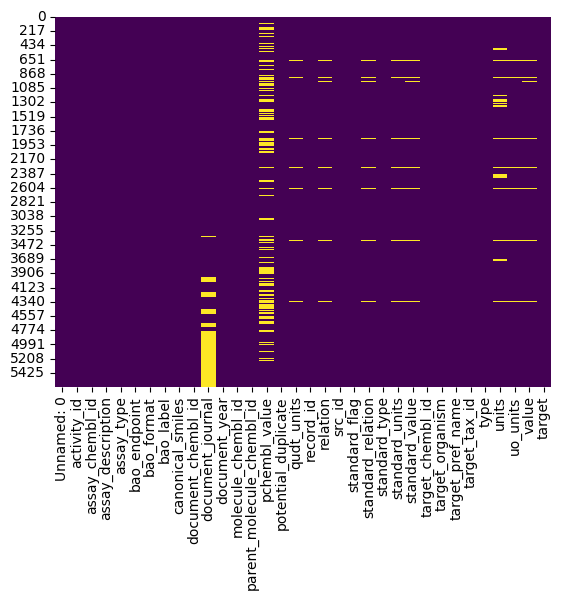

In [10]:
sns.heatmap(df.isnull(), cbar = False, cmap = 'viridis')

In [11]:
df = df.dropna()
df

,Unnamed: 0,activity_id,assay_chembl_id,assay_description,assay_type,bao_endpoint,bao_format,bao_label,canonical_smiles,document_chembl_id,...,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,type,units,uo_units,value,target
0,0,105745.0,CHEMBL882330,inhibitory concentration required to inhibit n...,B,BAO_0000190,BAO_0000357,single protein format,CC(=O)N[C@@H]([C@H](O)[C@H](O)CO)[C@H]1OC(O)(C...,CHEMBL1133646,...,40000.0,CHEMBL2051,Influenza A virus (A/Puerto Rico/8/1934(H1N1)),Neuraminidase,211044,IC50,uM,UO_0000065,40.000,CHEMBL2051
1,1,106883.0,CHEMBL882330,inhibitory concentration required to inhibit n...,B,BAO_0000190,BAO_0000357,single protein format,CCCCC(NC(C)=O)[C@@H]1CC(C(=O)O)C[C@H]1N=C(N)N,CHEMBL1133646,...,100.0,CHEMBL2051,Influenza A virus (A/Puerto Rico/8/1934(H1N1)),Neuraminidase,211044,IC50,uM,UO_0000065,0.100,CHEMBL2051
2,2,113311.0,CHEMBL882330,inhibitory concentration required to inhibit n...,B,BAO_0000190,BAO_0000357,single protein format,CC(=O)N[C@H]1[C@H]([C@H](O)[C@H](O)CO)OC(C(=O)...,CHEMBL1133646,...,10000.0,CHEMBL2051,Influenza A virus (A/Puerto Rico/8/1934(H1N1)),Neuraminidase,211044,IC50,uM,UO_0000065,10.000,CHEMBL2051
3,3,113312.0,CHEMBL882330,inhibitory concentration required to inhibit n...,B,BAO_0000190,BAO_0000357,single protein format,CCC(CC)[C@H](NC(C)=O)[C@@H]1[C@H](O)[C@@H](C(=...,CHEMBL1133646,...,1.4,CHEMBL2051,Influenza A virus (A/Puerto Rico/8/1934(H1N1)),Neuraminidase,211044,IC50,nM,UO_0000065,1.400,CHEMBL2051
4,4,114254.0,CHEMBL808314,Inhibitory activity against influenza A virus ...,B,BAO_0000190,BAO_0000357,single protein format,CC(=O)N[C@H]1[C@H]([C@H](O)[C@H](O)CO)OC(C(=O)...,CHEMBL1152059,...,2.0,CHEMBL2051,Influenza A virus (A/Puerto Rico/8/1934(H1N1)),Neuraminidase,211044,IC50,uM,UO_0000065,0.002,CHEMBL2051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4772,4772,12100238.0,CHEMBL2176198,Inhibition of human recombinant Myc-His10-tagg...,B,BAO_0000190,BAO_0000219,cell-based format,COc1c(F)c(C(=O)N[C@@H](CC(=O)O)c2ccccc2C)nn1-c...,CHEMBL2169867,...,30.0,CHEMBL6115,Homo sapiens,Lysosomal protective protein,9606,IC50,uM,UO_0000065,0.030,CHEMBL6115
4773,4773,12100239.0,CHEMBL2176198,Inhibition of human recombinant Myc-His10-tagg...,B,BAO_0000190,BAO_0000219,cell-based format,Cc1ccccc1[C@H](CC(=O)O)NC(=O)c1cc(OCC2CC2)n(-c...,CHEMBL2169867,...,15.0,CHEMBL6115,Homo sapiens,Lysosomal protective protein,9606,IC50,uM,UO_0000065,0.015,CHEMBL6115
4774,4774,12100240.0,CHEMBL2176198,Inhibition of human recombinant Myc-His10-tagg...,B,BAO_0000190,BAO_0000219,cell-based format,CCOc1cc(C(=O)N[C@@H](CC(=O)O)c2ccccc2C)nn1-c1c...,CHEMBL2169867,...,15.0,CHEMBL6115,Homo sapiens,Lysosomal protective protein,9606,IC50,uM,UO_0000065,0.015,CHEMBL6115
4775,4775,12100241.0,CHEMBL2176198,Inhibition of human recombinant Myc-His10-tagg...,B,BAO_0000190,BAO_0000219,cell-based format,COc1cc(C(=O)N[C@@H](CC(=O)O)c2ccccc2C)nn1-c1cc...,CHEMBL2169867,...,26.0,CHEMBL6115,Homo sapiens,Lysosomal protective protein,9606,IC50,uM,UO_0000065,0.026,CHEMBL6115


<Axes: >

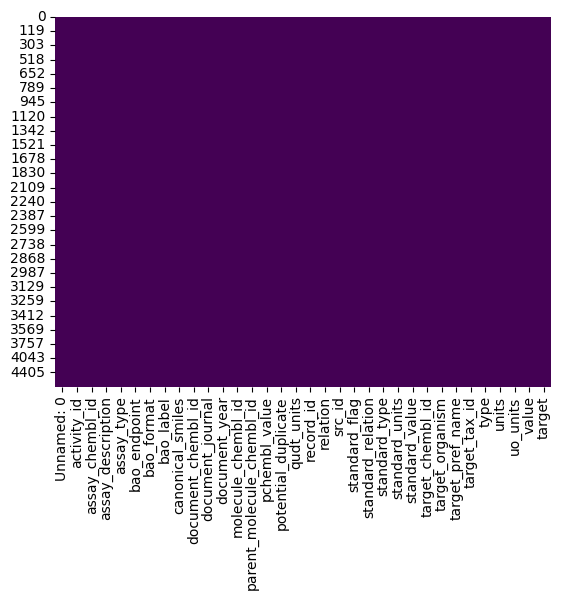

In [12]:
sns.heatmap(df.isnull(), cbar = False, cmap = 'viridis')

In [13]:
numerics = ['int16', 'int32', 'int64', 'float']
numeric_df = df.select_dtypes(include = numerics)
numeric_df

,Unnamed: 0,activity_id,document_year,pchembl_value,potential_duplicate,record_id,src_id,standard_flag,standard_value,target_tax_id,value
0,0,105745.0,2000.0,4.40,0.0,221284.0,1.0,1.0,40000.0,211044,40.000
1,1,106883.0,2000.0,7.00,0.0,221285.0,1.0,1.0,100.0,211044,0.100
2,2,113311.0,2000.0,5.00,0.0,221282.0,1.0,1.0,10000.0,211044,10.000
3,3,113312.0,2000.0,8.85,0.0,221286.0,1.0,1.0,1.4,211044,1.400
4,4,114254.0,1997.0,8.70,1.0,127901.0,1.0,1.0,2.0,211044,0.002
...,...,...,...,...,...,...,...,...,...,...,...
4772,4772,12100238.0,2012.0,7.52,0.0,1741344.0,1.0,1.0,30.0,9606,0.030
4773,4773,12100239.0,2012.0,7.82,0.0,1741343.0,1.0,1.0,15.0,9606,0.015
4774,4774,12100240.0,2012.0,7.82,0.0,1741342.0,1.0,1.0,15.0,9606,0.015
4775,4775,12100241.0,2012.0,7.58,0.0,1741341.0,1.0,1.0,26.0,9606,0.026


In [16]:
numeric_df.corr()

,Unnamed: 0,activity_id,document_year,pchembl_value,potential_duplicate,record_id,src_id,standard_flag,standard_value,target_tax_id,value
Unnamed: 0,1.000000,0.539249,0.581791,-0.139715,-0.091987,0.539224,NaN,NaN,0.086270,-0.074715,-0.073551
activity_id,0.539249,1.000000,0.928011,-0.002513,-0.168885,0.984302,NaN,NaN,-0.046614,0.200085,-0.086321
document_year,0.581791,0.928011,1.000000,-0.036911,-0.216479,0.951457,NaN,NaN,-0.020934,0.258180,-0.132459
pchembl_value,-0.139715,-0.002513,-0.036911,1.000000,0.120130,0.008497,NaN,NaN,-0.522106,0.278495,-0.148169
potential_duplicate,-0.091987,-0.168885,-0.216479,0.120130,1.000000,-0.162740,NaN,NaN,0.044043,-0.101281,-0.013335
record_id,0.539224,0.984302,0.951457,0.008497,-0.162740,1.000000,NaN,NaN,-0.049795,0.205639,-0.083390
src_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
standard_flag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
standard_value,0.086270,-0.046614,-0.020934,-0.522106,0.044043,-0.049795,NaN,NaN,1.000000,-0.190251,0.150606
target_tax_id,-0.074715,0.200085,0.258180,0.278495,-0.101281,0.205639,NaN,NaN,-0.190251,1.000000,-0.044004


<Axes: >

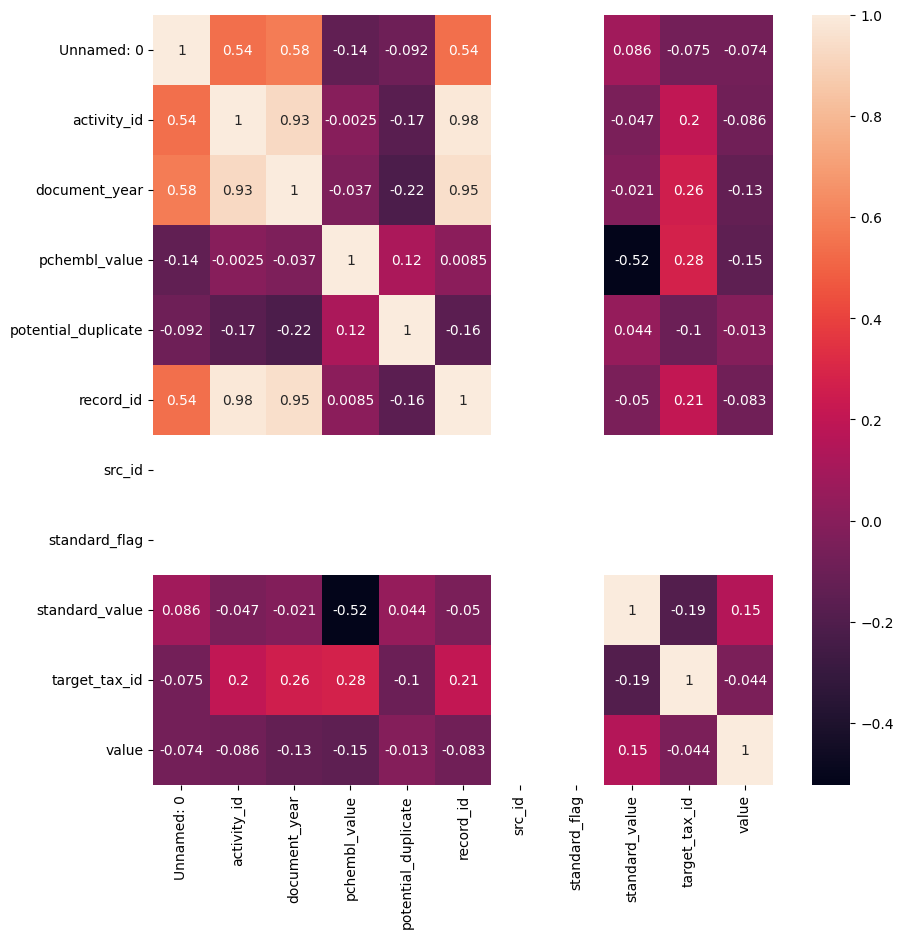

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(numeric_df.corr(), cbar = True, annot = True)

In [19]:
pd.unique(df['units'])


array(['M', 'uM', 'nM', 'NM', 'microM', 'umol/L', "10'-10M",
       "10'-4microM", "10'-8M", "10'-7M", "10'-6M", "10'-5M", "10'-9M",
       'mM'], dtype=object)

In [25]:
def convert_values(row):
    try:
        value = pd.to_numeric(row['value'],errors='coerce')
    except ValueError:
        return None
    if row['units'] == 'uM' or row['units'] == 'microM' or row['units'] == 'umol/L' or row['units'] == "10'-6M":
        return value / 1000000
    elif (row['units'] == 'nM') or (row['units'] == 'NM') or (row['units'] == "10'-9M"):
        return value / 1000000000
    elif row['units'] ==  "10'-10M":
        return value / 10000000000
    elif row['units'] == "10'-4microM":
        return value / 10000000000
    elif row['units'] == "10'-8M":
        return value / 100000000
    elif row['units'] == "10'-7M":
        return value / 10000000
    elif row['units'] == "10'-5M":
        return value / 100000
    elif row['units'] == 'mM':
        return value / 1000
    else:
        return value
df['value'] = df.apply(convert_values, axis = 1)
def convert_standard_values(row):
    try:
        value = pd.to_numeric(row['standard_value'],errors='coerce')
    except ValueError:
        return None
    if row['units'] == 'uM' or row['units'] == 'microM' or row['units'] == 'umol/L' or row['units'] == "10'-6M":
        return standard_value / 1000000
    elif (row['units'] == 'nM') or (row['units'] == 'NM') or (row['units'] == "10'-9M"):
        return standard_value / 1000000000
    elif row['units'] ==  "10'-10M":
        return standard_value / 10000000000
    elif row['units'] == "10'-4microM":
        return standard_value / 10000000000
    elif row['units'] == "10'-8M":
        return standard_value / 100000000
    elif row['units'] == "10'-7M":
        return standard_value / 10000000
    elif row['units'] == "10'-5M":
        return standard_value / 100000
    elif row['units'] == 'mM':
        return standard_value / 1000
    else:
        return standard_value
df['standard_value'] = df.apply(convert_values, axis = 1)

df['units'] = 'M'
df

,activity_id,assay_chembl_id,assay_description,assay_type,bao_endpoint,bao_format,bao_label,canonical_smiles,document_chembl_id,document_journal,...,target_chembl_id,target_organism,target_pref_name,target_tax_id,type,units,uo_units,value,target,fingerprint
0,72419,CHEMBL808321,inhibition of Influenza A Sialidase,B,BAO_0000192,BAO_0000357,single protein format,CC(=O)NC1C(O)C=C(C(=O)O)OC1[C@H](O)[C@H](O)CO,CHEMBL1127812,J Med Chem,...,CHEMBL2051,Influenza A virus (A/Puerto Rico/8/1934(H1N1)),Neuraminidase,211044,Ki,M,UO_0000065,4.000000e-06,CHEMBL2051,"[1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, ..."
1,72420,CHEMBL808321,inhibition of Influenza A Sialidase,B,BAO_0000192,BAO_0000357,single protein format,CC(=O)NC1C(NC(=N)N)C=C(C(=O)O)OC1C(O)[C@H](O)CO,CHEMBL1127812,J Med Chem,...,CHEMBL2051,Influenza A virus (A/Puerto Rico/8/1934(H1N1)),Neuraminidase,211044,Ki,M,UO_0000065,1.000000e-09,CHEMBL2051,"[1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, ..."
2,89474,CHEMBL808321,inhibition of Influenza A Sialidase,B,BAO_0000192,BAO_0000357,single protein format,CC(=O)NC1C(N)C=C(C(=O)O)OC1[C@H](O)[C@H](O)CO,CHEMBL1127812,J Med Chem,...,CHEMBL2051,Influenza A virus (A/Puerto Rico/8/1934(H1N1)),Neuraminidase,211044,Ki,M,UO_0000065,4.000000e-08,CHEMBL2051,"[1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, ..."
3,105745,CHEMBL882330,inhibitory concentration required to inhibit n...,B,BAO_0000190,BAO_0000357,single protein format,CC(=O)N[C@@H]([C@H](O)[C@H](O)CO)[C@H]1OC(O)(C...,CHEMBL1133646,J Med Chem,...,CHEMBL2051,Influenza A virus (A/Puerto Rico/8/1934(H1N1)),Neuraminidase,211044,IC50,M,UO_0000065,4.000000e-11,CHEMBL2051,"[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, ..."
4,106883,CHEMBL882330,inhibitory concentration required to inhibit n...,B,BAO_0000190,BAO_0000357,single protein format,CCCCC(NC(C)=O)[C@@H]1CC(C(=O)O)C[C@H]1N=C(N)N,CHEMBL1133646,J Med Chem,...,CHEMBL2051,Influenza A virus (A/Puerto Rico/8/1934(H1N1)),Neuraminidase,211044,IC50,M,UO_0000065,1.000000e-13,CHEMBL2051,"[0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6406,12100238,CHEMBL2176198,Inhibition of human recombinant Myc-His10-tagg...,B,BAO_0000190,BAO_0000219,cell-based format,COc1c(F)c(C(=O)N[C@@H](CC(=O)O)c2ccccc2C)nn1-c...,CHEMBL2169867,J Med Chem,...,CHEMBL6115,Homo sapiens,Lysosomal protective protein,9606,IC50,M,UO_0000065,3.000000e-14,CHEMBL6115,"[1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, ..."
6407,12100239,CHEMBL2176198,Inhibition of human recombinant Myc-His10-tagg...,B,BAO_0000190,BAO_0000219,cell-based format,Cc1ccccc1[C@H](CC(=O)O)NC(=O)c1cc(OCC2CC2)n(-c...,CHEMBL2169867,J Med Chem,...,CHEMBL6115,Homo sapiens,Lysosomal protective protein,9606,IC50,M,UO_0000065,1.500000e-14,CHEMBL6115,"[1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, ..."
6408,12100240,CHEMBL2176198,Inhibition of human recombinant Myc-His10-tagg...,B,BAO_0000190,BAO_0000219,cell-based format,CCOc1cc(C(=O)N[C@@H](CC(=O)O)c2ccccc2C)nn1-c1c...,CHEMBL2169867,J Med Chem,...,CHEMBL6115,Homo sapiens,Lysosomal protective protein,9606,IC50,M,UO_0000065,1.500000e-14,CHEMBL6115,"[1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, ..."
6409,12100241,CHEMBL2176198,Inhibition of human recombinant Myc-His10-tagg...,B,BAO_0000190,BAO_0000219,cell-based format,COc1cc(C(=O)N[C@@H](CC(=O)O)c2ccccc2C)nn1-c1cc...,CHEMBL2169867,J Med Chem,...,CHEMBL6115,Homo sapiens,Lysosomal protective protein,9606,IC50,M,UO_0000065,2.600000e-14,CHEMBL6115,"[1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, ..."


In [21]:
def smiles_to_mol(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        return Chem.RDKFingerprint(mol)
    else:
        return None

In [22]:
df['fingerprint'] = df['canonical_smiles'].apply(smiles_to_mol)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3366 entries, 0 to 6411
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   activity_id                3366 non-null   int64  
 1   assay_chembl_id            3366 non-null   object 
 2   assay_description          3366 non-null   object 
 3   assay_type                 3366 non-null   object 
 4   bao_endpoint               3366 non-null   object 
 5   bao_format                 3366 non-null   object 
 6   bao_label                  3366 non-null   object 
 7   canonical_smiles           3366 non-null   object 
 8   document_chembl_id         3366 non-null   object 
 9   document_journal           3366 non-null   object 
 10  document_year              3366 non-null   int64  
 11  molecule_chembl_id         3366 non-null   object 
 12  parent_molecule_chembl_id  3366 non-null   object 
 13  pchembl_value              3366 non-null   objec

In [34]:
len(df.columns)
# df.shape[0]

34